In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [30]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [40]:
print('Loan Status Unique:',df['loan_status'].unique())

Loan Status Unique: [1 0]


In [31]:
print('person_gender Unique:',df['person_gender'].unique(),'\n')
print('previous_loan_default_on_file Unique:', df['previous_loan_defaults_on_file'].unique())

df['person_gender'] = df['person_gender'].map({'male':1,'female':0})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes':1,'No':0})
df.head()

person_gender Unique: ['female' 'male'] 

previous_loan_default_on_file Unique: ['No' 'Yes']


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [32]:
print('Loan Intent Uniuqe:',df['loan_intent'].unique())
print('Person Home Ownership Uniuqe:',df['person_home_ownership'].unique())
print('Person Education Unique:',df['person_education'].unique())

Loan Intent Uniuqe: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Person Home Ownership Uniuqe: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Person Education Unique: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [33]:
from sklearn.preprocessing import OneHotEncoder

intent_ohe = OneHotEncoder(sparse_output=False)
ownership_ohe = OneHotEncoder(sparse_output=False)
education_ohe = OneHotEncoder(sparse_output=False)

intent_encoded = pd.DataFrame(intent_ohe.fit_transform(df[['loan_intent']]),columns=intent_ohe.get_feature_names_out(['loan_intent']))
ownership_encoded = pd.DataFrame(ownership_ohe.fit_transform(df[['person_home_ownership']]),columns=ownership_ohe.get_feature_names_out(['person_home_ownership']))
education_encoded = pd.DataFrame(education_ohe.fit_transform(df[['person_education']]),columns=education_ohe.get_feature_names_out(['person_education']))

df = pd.concat([df,intent_encoded,ownership_encoded,education_encoded],axis=1)
df.drop(['loan_intent','person_home_ownership','person_education'],axis=1,inplace=True)

df

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,15.66,0.31,3.0,645,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
44996,37.0,0,65800.0,17,9000.0,14.07,0.14,11.0,621,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
44997,33.0,1,56942.0,7,2771.0,10.02,0.05,10.0,668,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
44998,29.0,1,33164.0,4,12000.0,13.23,0.36,6.0,604,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [34]:
intent_encoded

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
44995,0.0,0.0,0.0,1.0,0.0,0.0
44996,0.0,0.0,1.0,0.0,0.0,0.0
44997,1.0,0.0,0.0,0.0,0.0,0.0
44998,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

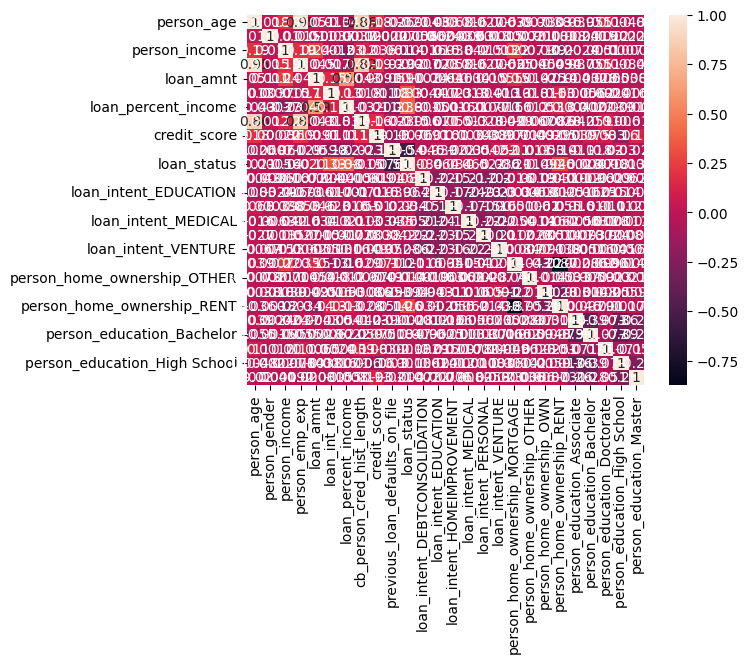

In [37]:
sns.heatmap(df.corr(),annot=True)

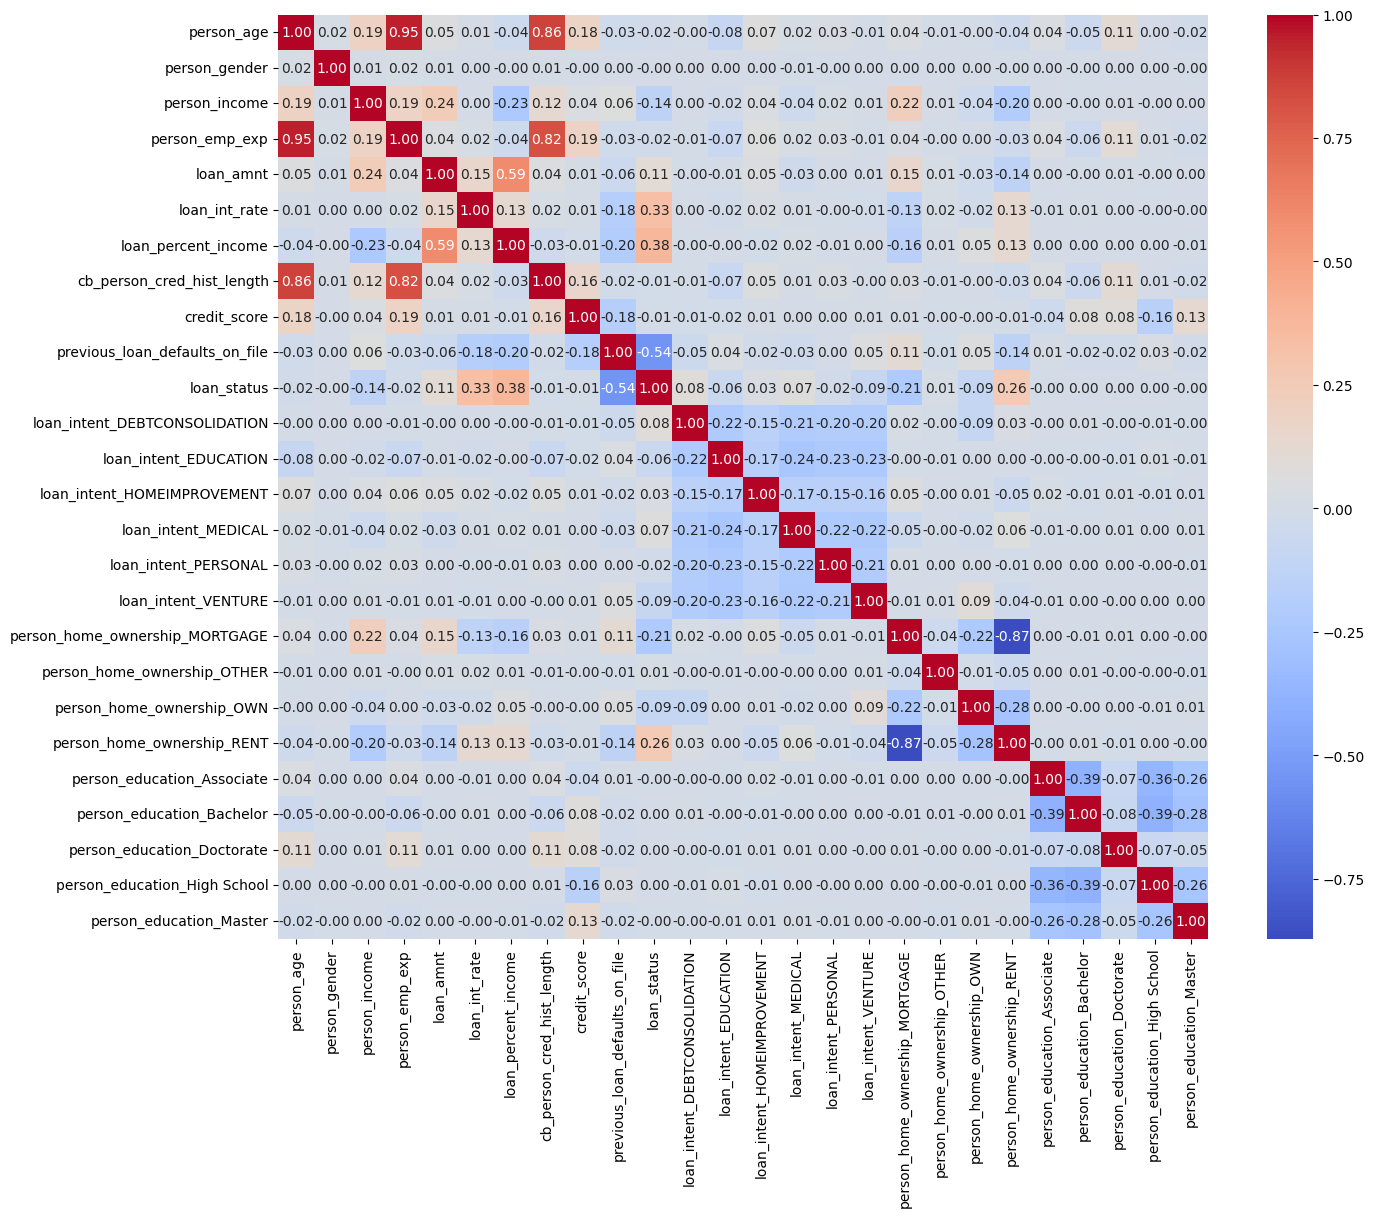

In [39]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [43]:
X = df[['previous_loan_defaults_on_file','loan_int_rate','loan_percent_income']]
y = df['loan_status']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

y_pred = lg.predict(X_test_scaled)
score = accuracy_score(y_test,y_pred)
score

0.8704444444444445

In [49]:
X_new = df[['previous_loan_defaults_on_file','loan_int_rate','loan_percent_income','person_home_ownership_MORTGAGE','person_home_ownership_RENT']]
y_new = df['loan_status']

In [50]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

new_scaler = StandardScaler()
X_train_new_scaled = new_scaler.fit_transform(X_train_new)
X_test_new_scaled = new_scaler.transform(X_test_new)

In [51]:
new_lg = LogisticRegression()
new_lg.fit(X_train_new_scaled,y_train_new)

y_pred_new = new_lg.predict(X_test_new_scaled)
score_new = accuracy_score(y_test_new,y_pred_new)
score_new

0.8765555555555555